# First steps into Quantum Computing

In [1]:
%matplotlib inline
import qiskit as qsk
import numpy as np
import matplotlib.pyplot as plt

# 1) Introduction

In this notebook I will introduce some important functions to use IBM qiskit, this will be done by an example of constructing an entangled state. 

# 2) Building a entangled stated from stcratch

We want to build a Bell State from a state that is $\left| 00 \right>$, the final state is:

$$
    \left| \psi \right> = \frac{\left| 00 \right> - \left| 11 \right>}{\sqrt 2}
$$

------------------------------
Observation: (Taken from qiskit website)

When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the left side of the tensor product, so that the basis vectors are labeled as $Q_n\otimes \cdots  \otimes  Q_1\otimes Q_0$. For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$. 

------------------------------

There are many gates, for reference see the [qiskit book](https://qiskit.org/textbook/ch-states/single-qubit-gates.html). The gates that we will use are:

- Pauli X: This is an one qubit gate that is represented on the computational basis by:

$$
X = \frac{1}{\sqrt2}
 \begin{pmatrix} 
0 & 1\\
1 & 0 \\
\end{pmatrix}
$$


- Hadamard: This is an one qubit gate that is represented on the computational basis by:

$$
H = \frac{1}{\sqrt2}
 \begin{pmatrix} 
1 & 1\\
1 & -1 \\
\end{pmatrix}
$$

- $C_x$(Controlled X): This is a two qubit gate that changes the second qubit if the first qubit is on the state $\left| 1 \right>$. On the computational basis is represented by:

\begin{equation}
C_x  = 
 \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
\end{equation}


## 2.1) Initializing quantum circuits

In qiskit there are many ways to initialize a quantum circuit, the easiest one is using the `QuantumCircuit` module on qiskit, this takes two arguments `qregisters` that can be a `QuantumRegister` or an int that designates how many quantum wires you want on your circuit, the other argument is `cregisters` that can be a `ClassicalRegister` or an int that designates how many classical wires you want on your circuit. An optional argument is the `Name` that will put a name on your circuit. 

I usually recommend starting using `QuantumRegister` and `ClassicalRegister` to build circuits, because this will modularize your code moving forward.

In order to see what you are doing, you can use the method `draw` inside `QuantumCircuit`, to make an image you use the 'mpl' argument inside the method.

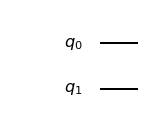

In [2]:
qreg = qsk.QuantumRegister(2, name='q')
circ = qsk.QuantumCircuit(qreg)
circ.draw('mpl')

## 2.2) Adding Gates

The main gates are methods inside you `QuantumCircuit`, thus if you want to add them you should only use .nameofthegate , in the introduction section there is a link to all gates on qiskit.

Since this is the first example, I shall use linear algebra to show what is happening when you use those gates to construct our entangled state.

All circuits on qiskit starts on the state $\left| 0 \right> = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, our first opperation is to transform the $\left| 0 \right>$ state into $\left| 1 \right>$ state, this is done by the Pauli X gate:

$$
X \left| 0 \right> = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \left| 1 \right>
$$

Thus we apply the X gate on the first register, this is done by assigning the gate to the position `0` of the QuantumRegister.

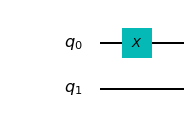

In [3]:
circ.x(qreg[0]); #Add x on 0
circ.draw('mpl')

Now we apply the Haddamard gate on the first register, since the register is already on $\left| 1 \right>$, we have:

$$
H \left| 1 \right> = \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} \bigg( \left| 0 \right> - \left| 1 \right> \bigg)
$$

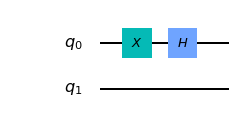

In [4]:
circ.h(qreg[0]); #Add x on 0
circ.draw('mpl')

In order to have an entangled state we shall use a gate that works on two qubits, this is done by the CNOT gate (also known as C-X), this will entangle the first and second qubit. It is important to note that now we have $2^2 = 4$ states (because we are working with two qubits). The CNOT works in this manner: $C_x \left| a \right>\left| b \right> = \left| a \right>\left| a \oplus b \right>$, where $\oplus$ means bitwise sum. 

$$
C_x \frac{1}{\sqrt{2}} \bigg( \left| 0 \right> - \left| 1 \right> \bigg)\left| 0 \right> = \frac{1}{\sqrt{2}} \bigg( \left| 0 \right>\left| 0 \oplus 0 \right> - \left| 1 \right>\left| 1 \oplus 0 \right> \bigg) = \frac{1}{\sqrt{2}} \bigg( \left| 00 \right> - \left| 11 \right> \bigg)
$$

That is exactly what we wanted.

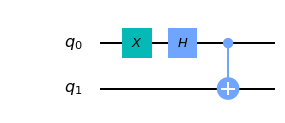

In [5]:
circ.cx(qreg[0], qreg[1]); #Add CNOT on 0 and 1
circ.draw(output='mpl')

## 2.3) Running a simulation of our circuit locally

There are several ways to run your circuits, you can run them locally or remotely on a real Quantum Computer. Now I will explain how to run it locall.

For a local simulation, we will use `qiskit.Aer` which is a high performance simulator that uses C++ simulator backends. We choose backend to run our circuit depending on what we need, here are some examples of backends:

- qasm_simulator: Runs the circuit just as the actual circuit on a quantum computer is run, therefore you need to measure the qubits at the end.

- statevector_simulator: Outputs the state on an ideal quantum circuit.

- unitary_simulator: Outputs the unitary operator of the given circuit.

- pulse_simulator: Simulates a pulse schedule for the circuit.

### 2.3.1) statevector_simulator

In this example we chose to run on the statevector_simulator in order to see if our circuit outputs exactly our desired state. Firstly, we chose the backend and then submit the job for the chosen backend using `qiskit.execute`. Lastly, we retrieve the job by calling `job.result()`

In [6]:
backend = qsk.Aer.get_backend('statevector_simulator')
job = qsk.execute(circ, backend)
result = job.result()

Let's print our result:

In [7]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[ 0.707-0.j  0.   +0.j  0.   +0.j -0.707+0.j]


We can also visualize our result by plotting the [density matrix](https://en.wikipedia.org/wiki/Density_matrix) of our state, this is done by taking the outer product of our state.

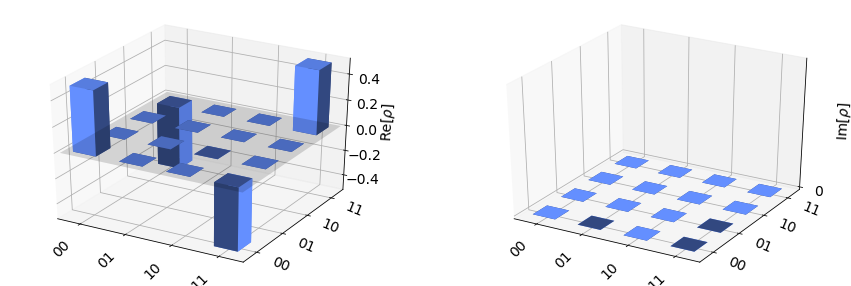

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

### 2.3.2) qasm_simullator

The previous simulation is a theoretical realization of our circuit, but when you are working with a real quantum computer you have to measure your qubits in order to get your results. This will cause the qubits to colapse to bits and we can acces them.

So we need to add the measurments on our circuits, this is done by adding a `ClassicalRegister` to our circuit.

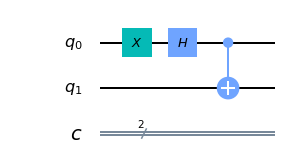

In [9]:
creg = qsk.ClassicalRegister(2, name='c')
circ.add_register(creg)
circ.draw('mpl')

We map the measurment from our quantum qubits to our classical bits.

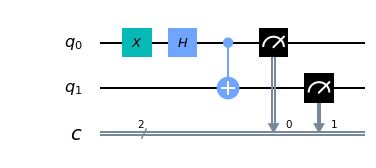

In [10]:
circ.measure(qreg,creg)
circ.draw('mpl')

Now we can simulate a real quantum computer using qasm_simulator, we need to define how many times our circuit will run, this is called "shots", here we chose 1024 times. 

In [11]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()

To acces the count of our state, we use the .get_counts(circ) that will give us a dictionary with the count of each state.

The best way to visualize this result is using a histogram that will output the probability associated with each state

In [12]:
counts = result_sim.get_counts(circ)
print(counts)

{'00': 532, '11': 492}


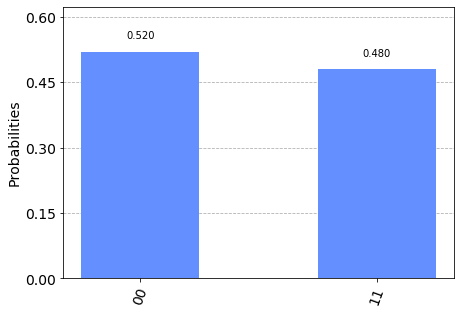

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Therefore, we have approximately 50% shots on each state. This is exactly what we expected for the bell state.

Note that by this method we cannot know the phase associated with each state, therefore we don't know if our state is any specific bell state, we only know that there are only '00' and '11' qubits on our state. 

To get the exact state, we need to do [Quantum State Tomography](https://en.wikipedia.org/wiki/Quantum_tomography), which I will talk about it in the future.

## 2.4) Runing the circuit on a real Quantum Computer

In order to acces the IBM Q, you will need to [register](https://quantum-computing.ibm.com/) and copy the Token from you profile. Here the token is on a `.txt` file in order to the token remain private on the code.

You only need to register your account on your computer once using `save_account`, after this you can get acces your account using `load_account`.

In [14]:
from qiskit import IBMQ
token = np.loadtxt("Token.txt", unpack=True, dtype=str)
IBMQ.save_account(token, overwrite=True)

In [15]:
provider = IBMQ.load_account();

There are several devices that we can access by registering to IBMQ, let's see which ones are available to us. 

In [16]:
backend_list = provider.backends()
for i in backend_list:
    print(f'{i} \n')

ibmq_qasm_simulator 

ibmqx2 

ibmq_16_melbourne 

ibmq_vigo 

ibmq_ourense 

ibmq_london 

ibmq_burlington 

ibmq_essex 

ibmq_armonk 

ibmq_rome 



Let's choose the least busy device that has at least 2 qubits.

In [17]:
from qiskit.providers.ibmq import least_busy

num_qubits = 2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= num_qubits and not x.configuration().simulator and x.status().operational==True))
backend


<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

Now we submit our job for the IBM Q platform, and monitor it by using the function `job_monitor`

In [18]:
from qiskit.tools.monitor import job_monitor

job_exp = qsk.execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [19]:
result_exp = job_exp.result()

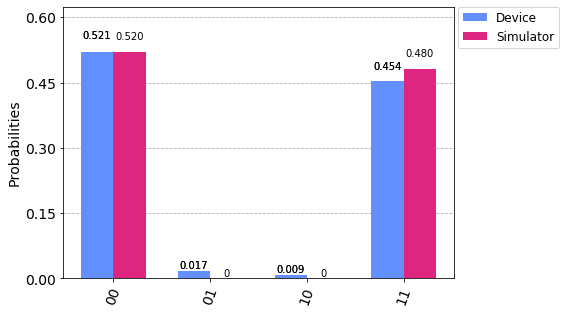

In [20]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

We can see that on our simulator everything is perfect, but when running on a real device there are several errors that occurs when running your circuit. I will explain some ways to correct those errors using linear algebra on other notebooks.

## 2.4) Retriving older jobs

If you want to retrieve older jobs after closing your code you need your job_id

In [21]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5ee007e341d47c001309221f


To acces your old job, you need to be in the same backend

In [22]:
retrieved_job = backend.retrieve_job(job_id)

In [23]:
retrieved_job.result().get_counts(circ)

{'01': 17, '10': 9, '00': 533, '11': 465}

-------------------------------------------------------------------

In [24]:
qsk.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.7.0',
 'qiskit': '0.19.1'}

In [25]:
from qiskit.tools.jupyter import *
%qiskit_version_table